In [86]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
from torchmetrics.classification import MulticlassF1Score
import CNNutils as utils
import torch.optim as optim
import torch.nn as nn
import os
import numpy as np

In [87]:
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=False, transform=transforms.ToTensor())

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=False, transform=transforms.ToTensor())

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [88]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [89]:
data_path='../0925/data/CIFAR/'
filelist=os.listdir(data_path)
trainlist=filelist[1:6]
trainlist

['data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5']

In [90]:
for file in trainlist:
    aa=unpickle(data_path+file)
    # print(aa[b'data'][0])
    # print(aa[b'data'].reshape(10000,3,1024))
    data=aa[b'data'].reshape(10000,3,32,32)
    label=aa[b'labels']
    if file==trainlist[0]:
        feature=data
        labels=label
    else: 
        feature=np.concatenate([feature,data],axis=0)
        labels=labels+label
        
    print(feature.shape)
    print(len(labels))

(10000, 3, 32, 32)
10000
(20000, 3, 32, 32)
20000
(30000, 3, 32, 32)
30000
(40000, 3, 32, 32)
40000
(50000, 3, 32, 32)
50000


In [91]:
test_file=filelist[-1]
test=unpickle(data_path+test_file)
test_feature=test[b'data'].reshape(10000,3,32,32)
test_label=test[b'labels']


In [92]:
trainset=utils.MyDataSet(feature,labels)
testset=utils.MyDataSet(test_feature,test_label)

In [93]:
# 확인
trainDL=DataLoader(trainset,batch_size=10)
for feature,target in trainDL:
    print(feature.shape)
    print(feature.T.shape)
    print(target)
    break

torch.Size([10, 3, 32, 32])
torch.Size([32, 32, 3, 10])
tensor([[6.],
        [9.],
        [9.],
        [4.],
        [1.],
        [1.],
        [2.],
        [7.],
        [8.],
        [3.]])


In [94]:
Batch_size=128
trainDL=DataLoader(trainset,batch_size=Batch_size)
testDL=DataLoader(testset,batch_size=Batch_size)

In [95]:
model=utils.CNNmodel(3,len(classes),32,Knums=[16,32,64,128],Pnums=[64,32,16])
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=5,factor=0.1,mode='max')
lossf=nn.CrossEntropyLoss()
scoref=MulticlassF1Score(num_classes=len(classes))

In [96]:
TRAIN=utils.Train_val(trainDL,testDL,model,optimizer,lossf,scoref)

In [97]:
EPOCH=20
history=TRAIN.train(EPOCH,scheduler,'1')

[1/20]
train loss 1.7443204197432378, train score 0.30763562115819176
test loss 1.455960988998413, test score 0.2845238149166107
scheduler.num_bad_epochs 0/5
[2/20]
train loss 1.2477280377122142, train score 0.5307921126980306
test loss 1.2674378156661987, test score 0.4133928418159485
scheduler.num_bad_epochs 0/5
[3/20]
train loss 1.0662785395027121, train score 0.6021208023018849
test loss 1.004880666732788, test score 0.5821428298950195
scheduler.num_bad_epochs 0/5
[4/20]
train loss 0.9313275871984185, train score 0.6569989832770794
test loss 1.0885071754455566, test score 0.543749988079071
scheduler.num_bad_epochs 1/5
[5/20]
train loss 0.8385724736296613, train score 0.6912763025754552
test loss 1.1786969900131226, test score 0.543749988079071
scheduler.num_bad_epochs 2/5
[6/20]
train loss 0.7680703725503839, train score 0.7207763720961178
test loss 1.3537739515304565, test score 0.5821428298950195
scheduler.num_bad_epochs 3/5
[7/20]
train loss 0.7181187770555696, train score 0.739

[3/20]  
train loss 1.0662785395027121, train score 0.6021208023018849   
test loss 1.004880666732788, test score 0.5821428298950195  
이게 최선은 아니겠죠...........

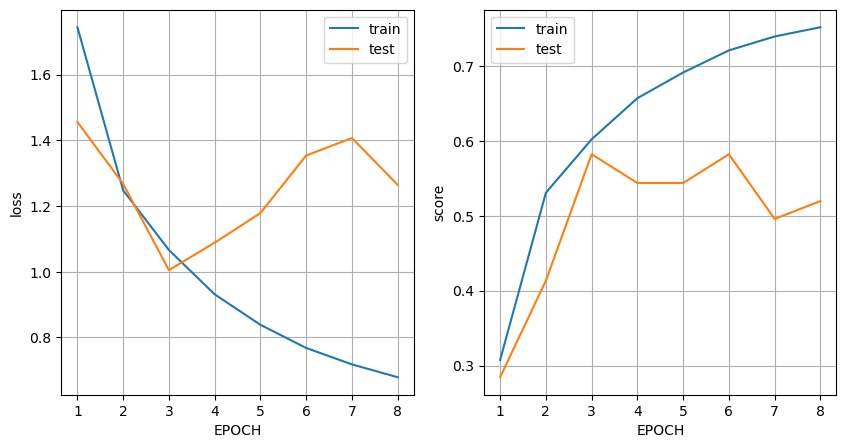

In [98]:
pp=utils.Plot_History(history)
pp.draw()